# Apriori

In [ ]:
import pandas as pd
!pip install apyori
from apyori import apriori
data = pd.read_csv('adult.csv')

In [2]:
data['gender'] = data['gender'].replace(0,'Male')
data['gender'] = data['gender'].replace(1,'Female')
data['gender']
data.to_csv('adult.csv')

In [3]:
data = data.astype(str)
data = data.values.tolist()

In [4]:
rules = list(apriori(data, min_support = 0.2, min_confidence = 0.9))
rules

[RelationRecord(items=frozenset({'20-30', '<=50K'}), support=0.22837964069254665, ordered_statistics=[OrderedStatistic(items_base=frozenset({'20-30'}), items_add=frozenset({'<=50K'}), confidence=0.9152084965613302, lift=1.2172370842277807)]),
 RelationRecord(items=frozenset({'White', '40-60'}), support=0.2469098255599244, ordered_statistics=[OrderedStatistic(items_base=frozenset({'40-60'}), items_add=frozenset({'White'}), confidence=0.9163911956784649, lift=1.0694715523442546)]),
 RelationRecord(items=frozenset({'<=50K', 'Never-married'}), support=0.3074533486846393, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Never-married'}), items_add=frozenset({'<=50K'}), confidence=0.9514621848739496, lift=1.2654548772443017)]),
 RelationRecord(items=frozenset({'>50K', 'White'}), support=0.22520800295440227, ordered_statistics=[OrderedStatistic(items_base=frozenset({'>50K'}), items_add=frozenset({'White'}), confidence=0.90763438977412, lift=1.0592519486987138)]),
 RelationRecord(it

In [5]:
result = pd.DataFrame()
for item in rules:
    series = pd.Series({'Rule':item[0],"Support":item[1],"Confidence":item[2][0][2]})
    result = result.append(series, ignore_index = True)

In [6]:
result = result.sort_values(by = ['Confidence'], ascending = False)
result

,Confidence,Rule,Support
5,0.968870,"(Never-married, <=50K, 20-40)",0.203506
8,0.960140,"(<=50K, Never-married, Private)",0.255360
12,0.957371,"(<=50K, Never-married, Private, White)",0.210762
2,0.951462,"(<=50K, Never-married)",0.307453
9,0.947825,"(<=50K, Never-married, White)",0.251776
6,0.927485,"(White, Male, 40-60)",0.203941
1,0.916391,"(White, 40-60)",0.246910
0,0.915208,"(20-30, <=50K)",0.228380
3,0.907634,"(>50K, White)",0.225208
11,0.906700,"(White, <=50K, Married-civ-spouse, Male)",0.203723


In [7]:
result[:5]

,Confidence,Rule,Support
5,0.968870,"(Never-married, <=50K, 20-40)",0.203506
8,0.960140,"(<=50K, Never-married, Private)",0.255360
12,0.957371,"(<=50K, Never-married, Private, White)",0.210762
2,0.951462,"(<=50K, Never-married)",0.307453
9,0.947825,"(<=50K, Never-married, White)",0.251776


# Naive Bayes

In [8]:
import pandas  as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
#引入需要的套件

In [9]:
df = pd.read_csv('mushrooms.csv')
df.info()
df
#讀入資料並查看資料的屬性特性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 12 columns):
type                      8124 non-null object
cap_shape                 8124 non-null object
cap_surface               8124 non-null object
cap_color                 8124 non-null object
odor                      8124 non-null object
stalk_shape               8124 non-null object
stalk_color_above_ring    8124 non-null object
stalk_color_below_ring    8124 non-null object
ring_number               8124 non-null object
ring_type                 8124 non-null object
population                8124 non-null object
habitat                   8124 non-null object
dtypes: object(12)
memory usage: 761.8+ KB


,type,cap_shape,cap_surface,cap_color,odor,stalk_shape,stalk_color_above_ring,stalk_color_below_ring,ring_number,ring_type,population,habitat
0,p,x,s,n,p,e,w,w,o,p,s,u
1,e,x,s,y,a,e,w,w,o,p,n,g
2,e,b,s,w,l,e,w,w,o,p,n,m
3,p,x,y,w,p,e,w,w,o,p,s,u
4,e,x,s,g,n,t,w,w,o,e,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,e,o,o,o,p,c,l
8120,e,x,s,n,n,e,o,o,o,p,v,l
8121,e,f,s,n,n,e,o,o,o,p,c,l
8122,p,k,y,n,y,t,w,w,o,e,v,l


In [10]:
df.isnull().any()

type                      False
cap_shape                 False
cap_surface               False
cap_color                 False
odor                      False
stalk_shape               False
stalk_color_above_ring    False
stalk_color_below_ring    False
ring_number               False
ring_type                 False
population                False
habitat                   False
dtype: bool

In [11]:
df1 = df["stalk_color_above_ring"]
df1.describe()

count     8124
unique       9
top          w
freq      4464
Name: stalk_color_above_ring, dtype: object

In [12]:
y = df.loc[:,['type']]
X = df.loc[:,["cap_shape","cap_surface","cap_color","odor","stalk_shape",
            "stalk_color_above_ring","stalk_color_below_ring","ring_number",
            "ring_type","population","habitat"]]

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_cap_shape_encoded = le.fit_transform(X.cap_shape)
X_cap_surface_encoded = le.fit_transform(X.cap_surface)
X_cap_color_encoded = le.fit_transform(X.cap_color)
X_odor_encoded = le.fit_transform(X.odor)
X_stalk_shape_encoded = le.fit_transform(X.stalk_shape)
X_stalk_color_above_ring_encoded = le.fit_transform(X.stalk_color_above_ring)
X_stalk_color_below_ring_encoded = le.fit_transform(X.stalk_color_below_ring)
X_ring_number_encoded = le.fit_transform(X.ring_number)
X_ring_type_encoded = le.fit_transform(X.ring_type)
X_population_encoded = le.fit_transform(X.population)
X_habitat_encoded = le.fit_transform(X.habitat)

y_type_label = le.fit_transform(y.type)

feature = list(zip(X_cap_shape_encoded,X_cap_surface_encoded,
                  X_cap_color_encoded,X_odor_encoded,
                  X_stalk_shape_encoded,X_stalk_color_above_ring_encoded,
                  X_stalk_color_below_ring_encoded,X_ring_number_encoded,
                  X_ring_type_encoded,X_population_encoded,X_habitat_encoded))

features = np.array(feature) #平整化



In [14]:
model = GaussianNB()
model.fit(features,y_type_label)

expected = y_type_label
predicted= model.predict(features)
from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4208
           1       0.79      0.87      0.83      3916

    accuracy                           0.83      8124
   macro avg       0.83      0.83      0.83      8124
weighted avg       0.83      0.83      0.83      8124



In [15]:
print(metrics.confusion_matrix(expected,predicted))

[[3296  912]
 [ 493 3423]]


# SVM

In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
#引入套件

In [17]:
df = pd.read_csv('heart.csv')
df.info()
#讀入資料並查看資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          302 non-null float64
trestbps    303 non-null int64
chol        301 non-null float64
fbs         303 non-null int64
restecg     300 non-null float64
thalach     303 non-null int64
exang       302 non-null float64
oldpeak     301 non-null float64
slope       302 non-null float64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


In [18]:
df.isnull().any()
#檢查資料是否有空值

age         False
sex         False
cp           True
trestbps    False
chol         True
fbs         False
restecg      True
thalach     False
exang        True
oldpeak      True
slope        True
ca          False
thal        False
target      False
dtype: bool

In [19]:
df.isnull().sum()
#檢查空值數量

age         0
sex         0
cp          1
trestbps    0
chol        2
fbs         0
restecg     3
thalach     0
exang       1
oldpeak     2
slope       1
ca          0
thal        0
target      0
dtype: int64

In [20]:
df = df.dropna()
df.isnull().any()
#將空值去除

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [21]:

y_label = df.loc[:,['target']]

Feature= df.loc[:,['age','sex','cp','trestbps',
              'chol','fbs','restecg','thalach',
              'exang','oldpeak','slope','ca','thal']]

S = StandardScaler()

S.fit(Feature)

Features = S.transform(Feature)

y_label = y_label.values.ravel()

Features
#資料前處理並對屬性做標準化

array([[ 0.96008384,  0.68190908,  1.97865831, ..., -2.26047188,
        -0.71658705, -2.12994828],
       [-1.90587175,  0.68190908,  1.00592864, ..., -2.26047188,
        -0.71658705, -0.50051004],
       [-1.46495551, -1.46647115,  0.03319897, ...,  0.9703489 ,
        -0.71658705, -0.50051004],
       ...,
       [ 1.51122914,  0.68190908, -0.93953071, ..., -0.64506149,
         1.23652928,  1.1289282 ],
       [ 0.29870947,  0.68190908, -0.93953071, ..., -0.64506149,
         0.25997112,  1.1289282 ],
       [ 0.29870947, -1.46647115,  0.03319897, ..., -0.64506149,
         0.25997112, -0.50051004]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Features, y_label, test_size=0.33, random_state=1)
#切分訓練集和測試集
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
#套入SVM model並用test data得出預測分數

0.865979381443299


# K Means

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv('BreastCancer.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [24]:
feature = df.loc[:,['radius_mean','area_mean']]

k = KMeans(n_clusters = 2)

clf = k.fit_predict(feature)

In [25]:
x = feature['radius_mean']
y = feature['area_mean']
feature

,radius_mean,area_mean
0,17.99,1001.0
1,20.57,1326.0
2,19.69,1203.0
3,11.42,386.1
4,20.29,1297.0
...,...,...
564,21.56,1479.0
565,20.13,1261.0
566,16.60,858.1
567,20.60,1265.0


Text(0, 0.5, 'area_mean')

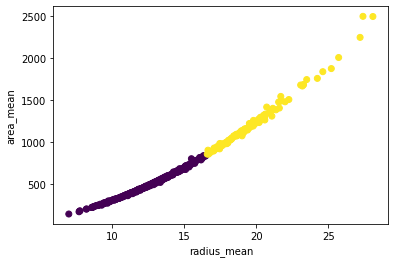

In [26]:
plt.scatter(x,y,c = clf)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')

In [27]:
feature = feature[feature['area_mean']<2000]
#對資料做篩選
feature

,radius_mean,area_mean
0,17.99,1001.0
1,20.57,1326.0
2,19.69,1203.0
3,11.42,386.1
4,20.29,1297.0
...,...,...
564,21.56,1479.0
565,20.13,1261.0
566,16.60,858.1
567,20.60,1265.0


In [28]:
k = KMeans(n_clusters = 2)

clf = k.fit_predict(feature)
x = feature['radius_mean']
y = feature['area_mean']

Text(0, 0.5, 'area_mean')

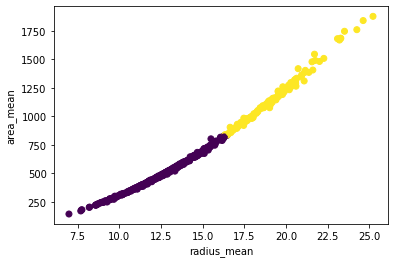

In [29]:
plt.scatter(x,y,c = clf)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
#篩選過後的分析結果

# PCA

In [31]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [32]:
#引入資料集
df = pd.read_csv('BreastCancer.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
#引入IRIS dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
#查看iris中的各種屬性
print(iris.keys())
#查看iris data的屬性
print(iris['feature_names'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [35]:
#切出iris data的features
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(x)
#切出iris target
y = pd.DataFrame(iris['target'], columns = ['target_names'])
y1 = iris['target']
print(y1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

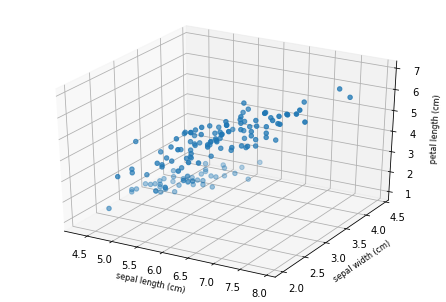

In [36]:
#繪畫3D圖
d1 = x['sepal length (cm)']
d2 = x['sepal width (cm)']
d3 = x['petal length (cm)']

#建立畫板
fig = plt.figure()
ax = Axes3D(fig) #引入3D繪畫套件
ax.scatter(d1, d2, d3) #散布圖

ax.set_xlabel("sepal length (cm)", fontsize=8)
ax.set_ylabel("sepal width (cm)", fontsize=8)
ax.set_zlabel("petal length (cm)", fontsize=8)
 
plt.show()

In [37]:
#引入PCA套件
from sklearn import decomposition
#建立PCA物件並設定參數，將維度降為2
pca = decomposition.PCA(n_components=2)
pca.fit(x)
#轉換x值
xx = pca.transform(x)
xx

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [38]:
#將x_pca分成x,y
x1 = xx[:,0]
x2 = xx[:,1]

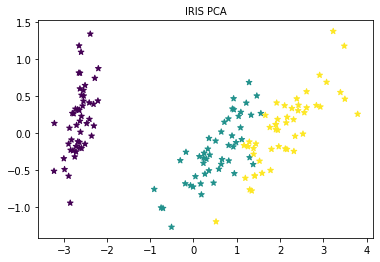

In [39]:
#畫出降維後的IRIS data
fig = plt.figure()
plt.scatter(x1 , x2,c=y1,marker = '*')
plt.title("IRIS PCA",fontsize = 10)
plt.show()

In [40]:
#切分breastCancer的dataset
dfx = df.loc[:,['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
              'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
              'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
              'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
              'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
dfy = df.loc[:,['diagnosis']]

In [41]:
#建立pca套件並帶入屬性降維成2維
pca = decomposition.PCA(n_components=2)
pca.fit(dfx)
x_pca1 = pca.transform(dfx)
x_pca1

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [42]:
p = x_pca1[:,0]
q = x_pca1[:,1]

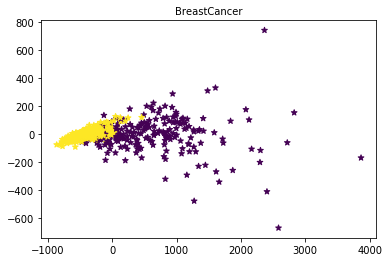

In [43]:
#畫圖
fig = plt.figure()
plt.scatter(p,q,c = dfy['diagnosis'],marker = '*')
plt.title("BreastCancer",fontsize = 10)
plt.show()

# Naive bayes 圖像化

In [44]:
#引入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
!pip install scikit-plot

In [45]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [46]:
#轉換性別為數字
df['Gender'] = df['Gender'].replace('Male',0)
df['Gender'] = df["Gender"].replace('Female',1)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [47]:
X = df.loc[:,['Gender','Age','EstimatedSalary']]
y = df.loc[:,['Purchased']]

In [48]:
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
#切分資料集

In [50]:
model = GaussianNB() #引入模型
model.fit(x_train, y_train) #用訓練資料訓練模型
a = model.predict(x_test) #用測試資料得出預測結果
accuracy = accuracy_score(y_test, a) #算出準確率
print('準確率：',accuracy)
print(metrics.classification_report(y,model.predict(X)))

準確率： 0.8333333333333334
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       257
           1       0.85      0.79      0.82       143

    accuracy                           0.88       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.88      0.87       400



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC score: 0.8242556281771968


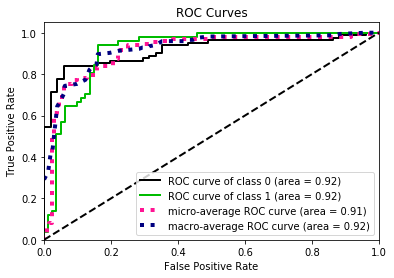

In [52]:
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc, roc_auc_score
roc_auc = roc_auc_score(y_test, model.predict(x_test))
print('AUC score:',roc_auc)
p = model.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, p)
plt.show()

#ROC curve & AUC value

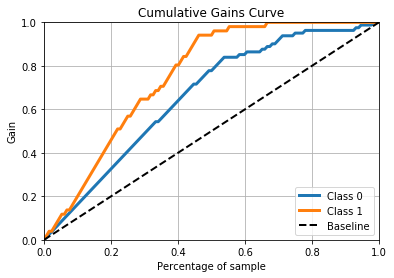

In [53]:
skplt.metrics.plot_cumulative_gain(y_test, p)
plt.show()

#lift_chart

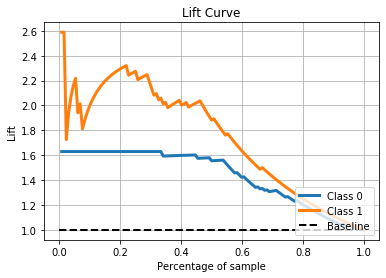

In [54]:
skplt.metrics.plot_lift_curve(y_test, p)
#lift_curve